### Technical Project: Data Analysis on Mental Health Disorders

## Hypothesis 1

###1. Data Aggregation

###CSV dataset

The first step is to load the csv file which is downloaded to the dbfs (Databricks Filesystem) to a spark dataframe.

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/depression_gender.csv"))

df.printSchema()


root
-- Entity: string (nullable = true)
-- Code: string (nullable = true)
-- Year: integer (nullable = true)
-- Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent): double (nullable = true)
-- Population (historical estimates): long (nullable = true)
-- Continent: string (nullable = true)

In [0]:
df.show()

+-----------+--------+----+-------------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------+---------+
 Entity| Code|Year|Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)|Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)|Population (historical estimates)|Continent|
+-----------+--------+----+-------------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------+---------+
 Abkhazia|OWID_ABK|2015| null| null| null| Asia|
Afghanistan| AFG|1990| 4.291053994| 5.859655937| 12412311| Asia|
Afghanistan| AFG|1991| 4.293268325| 5.853078393| 13299016| Asia|
Afghanistan| AFG|1992| 4.298264516| 5.850020189| 14485543| Asia|
Afghanistan| AFG|1993| 4.303086956| 5.844986542| 15816601| Asia|
Afghanistan| AFG|1994| 4.306052782| 5.843623114| 17075728| Asia|
Afghanistan| AFG|1995| 4.307069245| 5.843230962| 18110662| Asia|
Afghanistan| AFG|1996| 4.309517706| 5.846325961| 18853444| Asia|
Afghanistan| AFG|1997| 4.313820351| 5.851589758| 19357126| Asia|
Afghanistan| AFG|1998| 4.318712645| 5.859475715| 19737770| Asia|
Afghanistan| AFG|1999| 4.320813206| 5.865883835| 20170847| Asia|
Afghanistan| AFG|2000| 4.323995727| 5.868993829| 20779957| Asia|
Afghanistan| AFG|2001| 4.324069652| 5.865985898| 21606992| Asia|
Afghanistan| AFG|2002| 4.325468358| 5.859883956| 22600774| Asia|
Afghanistan| AFG|2003| 4.324686251| 5.848194164| 23680871| Asia|
Afghanistan| AFG|2004| 4.326707997| 5.841936536| 24726689| Asia|
Afghanistan| AFG|2005| 4.330604822| 5.833871877| 25654274| Asia|
Afghanistan| AFG|2006| 4.333657398| 5.831662667| 26433058| Asia|
Afghanistan| AFG|2007| 4.346034854| 5.82398739| 27100542| Asia|
Afghanistan| AFG|2008| 4.352167384| 5.817282939| 27722281| Asia|
+-----------+--------+----+-------------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------+---------+
only showing top 20 rows

Next step is to import nessasry libraries

In [0]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
import pandas as pd
pd.options.mode.chained_assignment = None

## 2. Data Transformation

Check columns names and convert them to simple format

In [0]:
df = df.withColumnRenamed("Entity", "country")\
       .withColumnRenamed("Code", "CountryCode")\
       .withColumnRenamed("Year", "Year")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)", "PrevalenceMale")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)", "PrevalenceFemale")\
       .withColumnRenamed("Population (historical estimates)", "Population")\
       .withColumnRenamed("Continent", "Continent")\
   
df.show()
df.printSchema()

+-----------+-----------+----+--------------+----------------+----------+---------+
 country|CountryCode|Year|PrevalenceMale|PrevalenceFemale|Population|Continent|
+-----------+-----------+----+--------------+----------------+----------+---------+
 Abkhazia| OWID_ABK|2015| null| null| null| Asia|
Afghanistan| AFG|1990| 4.291053994| 5.859655937| 12412311| Asia|
Afghanistan| AFG|1991| 4.293268325| 5.853078393| 13299016| Asia|
Afghanistan| AFG|1992| 4.298264516| 5.850020189| 14485543| Asia|
Afghanistan| AFG|1993| 4.303086956| 5.844986542| 15816601| Asia|
Afghanistan| AFG|1994| 4.306052782| 5.843623114| 17075728| Asia|
Afghanistan| AFG|1995| 4.307069245| 5.843230962| 18110662| Asia|
Afghanistan| AFG|1996| 4.309517706| 5.846325961| 18853444| Asia|
Afghanistan| AFG|1997| 4.313820351| 5.851589758| 19357126| Asia|
Afghanistan| AFG|1998| 4.318712645| 5.859475715| 19737770| Asia|
Afghanistan| AFG|1999| 4.320813206| 5.865883835| 20170847| Asia|
Afghanistan| AFG|2000| 4.323995727| 5.868993829| 20779957| Asia|
Afghanistan| AFG|2001| 4.324069652| 5.865985898| 21606992| Asia|
Afghanistan| AFG|2002| 4.325468358| 5.859883956| 22600774| Asia|
Afghanistan| AFG|2003| 4.324686251| 5.848194164| 23680871| Asia|
Afghanistan| AFG|2004| 4.326707997| 5.841936536| 24726689| Asia|
Afghanistan| AFG|2005| 4.330604822| 5.833871877| 25654274| Asia|
Afghanistan| AFG|2006| 4.333657398| 5.831662667| 26433058| Asia|
Afghanistan| AFG|2007| 4.346034854| 5.82398739| 27100542| Asia|
Afghanistan| AFG|2008| 4.352167384| 5.817282939| 27722281| Asia|
+-----------+-----------+----+--------------+----------------+----------+---------+
only showing top 20 rows

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- PrevalenceMale: double (nullable = true)
-- PrevalenceFemale: double (nullable = true)
-- Population: long (nullable = true)
-- Continent: string (nullable = true)

In [0]:
df.count()


Out[16]: 57595

In [0]:


df.createOrReplaceTempView("df")
df.count()

Out[17]: 57595

It was observed that one column constist of null values and it is not required.

In [0]:
depressiondf=sqlContext.sql('select * from df where PrevalenceFemale IS NOT NULL or PrevalenceMale IS NOT NULL')
depressiondf.show()

+-----------+-----------+----+--------------+----------------+----------+---------+
 country|CountryCode|Year|PrevalenceMale|PrevalenceFemale|Population|Continent|
+-----------+-----------+----+--------------+----------------+----------+---------+
Afghanistan| AFG|1990| 4.291053994| 5.859655937| 12412311| Asia|
Afghanistan| AFG|1991| 4.293268325| 5.853078393| 13299016| Asia|
Afghanistan| AFG|1992| 4.298264516| 5.850020189| 14485543| Asia|
Afghanistan| AFG|1993| 4.303086956| 5.844986542| 15816601| Asia|
Afghanistan| AFG|1994| 4.306052782| 5.843623114| 17075728| Asia|
Afghanistan| AFG|1995| 4.307069245| 5.843230962| 18110662| Asia|
Afghanistan| AFG|1996| 4.309517706| 5.846325961| 18853444| Asia|
Afghanistan| AFG|1997| 4.313820351| 5.851589758| 19357126| Asia|
Afghanistan| AFG|1998| 4.318712645| 5.859475715| 19737770| Asia|
Afghanistan| AFG|1999| 4.320813206| 5.865883835| 20170847| Asia|
Afghanistan| AFG|2000| 4.323995727| 5.868993829| 20779957| Asia|
Afghanistan| AFG|2001| 4.324069652| 5.865985898| 21606992| Asia|
Afghanistan| AFG|2002| 4.325468358| 5.859883956| 22600774| Asia|
Afghanistan| AFG|2003| 4.324686251| 5.848194164| 23680871| Asia|
Afghanistan| AFG|2004| 4.326707997| 5.841936536| 24726689| Asia|
Afghanistan| AFG|2005| 4.330604822| 5.833871877| 25654274| Asia|
Afghanistan| AFG|2006| 4.333657398| 5.831662667| 26433058| Asia|
Afghanistan| AFG|2007| 4.346034854| 5.82398739| 27100542| Asia|
Afghanistan| AFG|2008| 4.352167384| 5.817282939| 27722281| Asia|
Afghanistan| AFG|2009| 4.36224077| 5.812267255| 28394806| Asia|
+-----------+-----------+----+--------------+----------------+----------+---------+
only showing top 20 rows

In [0]:
depressiondf.count()

Out[19]: 8190

In [0]:


groupByDF = depressiondf.groupBy("Year").avg("PrevalenceFemale","PrevalenceMale").dropna().sort('Year')

groupByDF.show(50)

+----+---------------------+-------------------+
Year|avg(PrevalenceFemale)|avg(PrevalenceMale)|
+----+---------------------+-------------------+
1990| 4.752661780340658| 3.1349550307289373|
1991| 4.754983226490841| 3.137976602527472|
1992| 4.757082158282048| 3.141017001000002|
1993| 4.758690608794875| 3.143965330919415|
1994| 4.759946027296705| 3.1467033507216122|
1995| 4.7606586793040275| 3.1491436069890097|
1996| 4.762956747655677| 3.1529147410659366|
1997| 4.767525686908427| 3.1590527170000002|
1998| 4.772375559655682| 3.1656498507032964|
1999| 4.775507132021973| 3.1711185967032955|
2000| 4.774856095721611| 3.1737060829890122|
2001| 4.770444728721611| 3.174086948183152|
2002| 4.7636543643333304| 3.174048391710625|
2003| 4.755420827128205| 3.173258381080586|
2004| 4.746435231230771| 3.171835856963369|
2005| 4.7373851980036665| 3.16956761885348|
2006| 4.722092066578752| 3.163171439197805|
2007| 4.697710461454214| 3.1515539272454203|
2008| 4.670807506956046| 3.1384231717838813|
2009| 4.647606892981684| 3.1273461724175826|
2010| 4.634247171527472| 3.121366856564102|
2011| 4.62854719549084| 3.1200954861282035|
2012| 4.623398076073261| 3.1199587053040294|
2013| 4.619303418373623| 3.1206235768571453|
2014| 4.616562839252751| 3.121368144897438|
2015| 4.615837267582417| 3.122024090358974|
2016| 4.6166479564468865| 3.1199132148095234|
2017| 4.617781049062272| 3.1187998020915764|
2018| 4.621832280575088| 3.123277412194139|
2019| 4.62865612511722| 3.131489861809522|
+----+---------------------+-------------------+

## 3. Data Visualization

Out[21]:

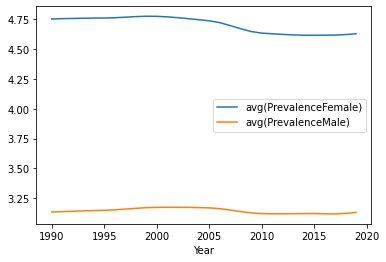

<AxesSubplot:xlabel='Year'>

In [0]:
groupByDF.toPandas().plot(kind='line',x='Year')


In [0]:
from pyspark.sql.functions import udf
year_range = udf(lambda Year: ' < 1995' if Year < 1995 else 
                   '1995-2000' if (Year >= 1995 and Year < 2000) else
                   '2000-2005' if (Year >= 2000 and Year < 2005) else
                   '2005-2010' if (Year >= 2005 and Year < 2010) else
                   '2010-2015' if (Year >= 2010 and Year < 2015) else
                   '2015-2019' if (Year >= 2015 and Year < 2019) else
               
                    '2019+'  if (Year >= 2019) else '')

depression_gender_df = groupByDF.withColumn('year_range', year_range(groupByDF.Year))
depression_gender_sdf=depression_gender_df.groupBy(['year_range']).avg('avg(PrevalenceFemale)','avg(PrevalenceMale)').sort('year_range')
depression_gender_sdf_new= depression_gender_sdf.withColumnRenamed("avg(avg(PrevalenceFemale))", "Female")\
       .withColumnRenamed("avg(avg(PrevalenceMale))", "Male")\
depression_gender_sdf_new.show()
depression_gender_sdf_new.printSchema()
depression_gender_sdf_new.show()

File "<command-1839238367913814>" , line 15 
 depression_gender_sdf_new.show() 
 ^
 SyntaxError : invalid syntax

In [0]:
display(depression_gender_sdf_new)

###Hypothesis 2

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

age_df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/depression_agegroup.csv"))

age_df.printSchema()

root
-- Entity: string (nullable = true)
-- Code: string (nullable = true)
-- Year: integer (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent): double (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent): double (nullable = true)

In [0]:
age_df.show()

+-----------+----+----+-----------------------------------------------------------------------+-----------------------------------------------------------------------+------------------------------------------------------------------------+-----------------------------------------------------------------------+-----------------------------------------------------------------------+-----------------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
 Entity|Code|Year|Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)|Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)|
+-----------+----+----+-----------------------------------------------------------------------+-----------------------------------------------------------------------+------------------------------------------------------------------------+-----------------------------------------------------------------------+-----------------------------------------------------------------------+-----------------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
Afghanistan| AFG|1990| 6.188668667| 1.799606183| 5.584945842| 7.348991811| 4.478877905| 6.778987722| 6.961487218| 6.430921963|
Afghanistan| AFG|1991| 6.164282121| 1.784157028| 5.58313668| 7.327852027| 4.435681366| 6.719144063| 6.966887366| 6.373603553|
Afghanistan| AFG|1992| 6.13513854| 1.772709515| 5.581337166| 7.304312827| 4.396269779| 6.641635707| 6.979891986| 6.323968604|
Afghanistan| AFG|1993| 6.126729513| 1.761155077| 5.581459639| 7.275676965| 4.37666036| 6.609489332| 6.987642568| 6.324157323|
Afghanistan| AFG|1994| 6.109095742| 1.757582863| 5.582418812| 7.246834841| 4.378084363| 6.603527668| 7.004027038| 6.35049657|
Afghanistan| AFG|1995| 6.088510834| 1.755815827| 5.584823151| 7.213642189| 4.381837739| 6.609234278| 7.008470324| 6.381976794|
Afghanistan| AFG|1996| 6.090795793| 1.750014611| 5.58876335| 7.18289608| 4.388228774| 6.609332178| 7.018874465| 6.4140869|
Afghanistan| AFG|1997| 6.099857129| 1.751823706| 5.595918648| 7.164129041| 4.394495346| 6.61850149| 7.032331148| 6.445660217|
Afghanistan| AFG|1998| 6.119775838| 1.757702265| 5.616863163| 7.163947408| 4.410965526| 6.631366883| 7.051112385| 6.481151847|
Afghanistan| AFG|1999| 6.149715264| 1.755018622| 5.629475872| 7.177921436| 4.423051518| 6.637222339| 7.080073644| 6.510675675|
Afghanistan| AFG|2000| 6.175142827| 1.757586014| 5.624006692| 7.193595913| 4.433335183| 6.642843825| 7.074325555| 6.540946425|
Afghanistan| AFG|2001| 6.183209875| 1.757854219| 5.632403924| 7.200476185| 4.425864264| 6.629991129| 7.083194939| 6.540404415|
Afghanistan| AFG|2002| 6.167735475| 1.755727866| 5.634164797| 7.189213706| 4.403539949| 6.6172441| 7.094846865| 6.526277019|
Afghanistan| AFG|2003| 6.139544261| 1.757578162| 5.633034356| 7.170669849| 4.394236288| 6.610291152| 7.092166038| 6.513965525|
Afghanistan| AFG|2004| 6.120358738| 1.755255681| 5.637987594| 7.157143726| 4.383919502| 6.619537018| 7.090607729| 6.505424453|
Afghanistan| AFG|2005| 6.111493757| 1.753028071| 5.636817937| 7.135759509| 4.382915485| 6.620456741| 7.095999883| 6.495032272|
Afghanistan| AFG|2006| 6.094707774| 1.751167248| 5.647587758| 7.127653073| 4.377162262| 6.62297035| 7.093115284| 6.485989789|
Afghanistan| AFG|2007| 6.082707222| 1

In [0]:
age_depression_df = age_df.withColumnRenamed("Entity", "country")\
       .withColumnRenamed("Code", "CountryCode")\
       .withColumnRenamed("Year", "Year")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)", "20to24")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)", "10to14")\
              .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)","70to90")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)", "30to34")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)", "15to19")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)", "25to29")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)","50to69")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)","35to49")\
      
   
age_depression_df.show()
age_depression_df.printSchema()

+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
 country|CountryCode|Year| 20to24| 10to14| 70to90| 30to34| 15to19| 25to29| 50to69| 35to49|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
Afghanistan| AFG|1990|6.188668667|1.799606183|5.584945842|7.348991811|4.478877905|6.778987722|6.961487218|6.430921963|
Afghanistan| AFG|1991|6.164282121|1.784157028| 5.58313668|7.327852027|4.435681366|6.719144063|6.966887366|6.373603553|
Afghanistan| AFG|1992| 6.13513854|1.772709515|5.581337166|7.304312827|4.396269779|6.641635707|6.979891986|6.323968604|
Afghanistan| AFG|1993|6.126729513|1.761155077|5.581459639|7.275676965| 4.37666036|6.609489332|6.987642568|6.324157323|
Afghanistan| AFG|1994|6.109095742|1.757582863|5.582418812|7.246834841|4.378084363|6.603527668|7.004027038| 6.35049657|
Afghanistan| AFG|1995|6.088510834|1.755815827|5.584823151|7.213642189|4.381837739|6.609234278|7.008470324|6.381976794|
Afghanistan| AFG|1996|6.090795793|1.750014611| 5.58876335| 7.18289608|4.388228774|6.609332178|7.018874465| 6.4140869|
Afghanistan| AFG|1997|6.099857129|1.751823706|5.595918648|7.164129041|4.394495346| 6.61850149|7.032331148|6.445660217|
Afghanistan| AFG|1998|6.119775838|1.757702265|5.616863163|7.163947408|4.410965526|6.631366883|7.051112385|6.481151847|
Afghanistan| AFG|1999|6.149715264|1.755018622|5.629475872|7.177921436|4.423051518|6.637222339|7.080073644|6.510675675|
Afghanistan| AFG|2000|6.175142827|1.757586014|5.624006692|7.193595913|4.433335183|6.642843825|7.074325555|6.540946425|
Afghanistan| AFG|2001|6.183209875|1.757854219|5.632403924|7.200476185|4.425864264|6.629991129|7.083194939|6.540404415|
Afghanistan| AFG|2002|6.167735475|1.755727866|5.634164797|7.189213706|4.403539949| 6.6172441|7.094846865|6.526277019|
Afghanistan| AFG|2003|6.139544261|1.757578162|5.633034356|7.170669849|4.394236288|6.610291152|7.092166038|6.513965525|
Afghanistan| AFG|2004|6.120358738|1.755255681|5.637987594|7.157143726|4.383919502|6.619537018|7.090607729|6.505424453|
Afghanistan| AFG|2005|6.111493757|1.753028071|5.636817937|7.135759509|4.382915485|6.620456741|7.095999883|6.495032272|
Afghanistan| AFG|2006|6.094707774|1.751167248|5.647587758|7.127653073|4.377162262| 6.62297035|7.093115284|6.485989789|
Afghanistan| AFG|2007|6.082707222|1.749966342| 5.66357422|7.120023115|4.377144101|6.615084152|7.087530862|6.470006356|
Afghanistan| AFG|2008| 6.06910205|1.749053278|5.675689121|7.117619789|4.358963078|6.596494407|7.074052947|6.449627036|
Afghanistan| AFG|2009|6.065762408|1.749338518|5.688516985| 7.13264991| 4.35460602|6.581109407|7.068784838|6.437762286|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 20 rows

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- 20to24: double (nullable = true)
-- 10to14: double (nullable = true)
-- 70to90: double (nullable = true)
-- 30to34: double (nullable = true)
-- 15to19: double (nullable = true)
-- 25to29: double (nullable = true)
-- 50to69: double (nullable = true)
-- 35to49: double (nullable = true)

In [0]:
age_depression_df.count()


Out[26]: 8220

In [0]:
age_depression_df.createOrReplaceTempView("age_depression_df")
age_depression_df.count()
age_depression_df.printSchema()

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- 20to24: double (nullable = true)
-- 10to14: double (nullable = true)
-- 70to90: double (nullable = true)
-- 30to34: double (nullable = true)
-- 15to19: double (nullable = true)
-- 25to29: double (nullable = true)
-- 50to69: double (nullable = true)
-- 35to49: double (nullable = true)

In [0]:
age_depressiondf = sqlContext.sql('select * from age_depression_df where 20to24 IS NOT NULL or 10to14 IS NOT NULL or 70to90 IS NOT NULL or 30to34 IS NOT NULL or 15to19 IS NOT NULL or 25to29 IS NOT NULL or 50to69 IS NOT NULL or 35to49 IS NOT NULL')
age_depressiondf.show()

+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
 country|CountryCode|Year| 20to24| 10to14| 70to90| 30to34| 15to19| 25to29| 50to69| 35to49|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
Afghanistan| AFG|1990|6.188668667|1.799606183|5.584945842|7.348991811|4.478877905|6.778987722|6.961487218|6.430921963|
Afghanistan| AFG|1991|6.164282121|1.784157028| 5.58313668|7.327852027|4.435681366|6.719144063|6.966887366|6.373603553|
Afghanistan| AFG|1992| 6.13513854|1.772709515|5.581337166|7.304312827|4.396269779|6.641635707|6.979891986|6.323968604|
Afghanistan| AFG|1993|6.126729513|1.761155077|5.581459639|7.275676965| 4.37666036|6.609489332|6.987642568|6.324157323|
Afghanistan| AFG|1994|6.109095742|1.757582863|5.582418812|7.246834841|4.378084363|6.603527668|7.004027038| 6.35049657|
Afghanistan| AFG|1995|6.088510834|1.755815827|5.584823151|7.213642189|4.381837739|6.609234278|7.008470324|6.381976794|
Afghanistan| AFG|1996|6.090795793|1.750014611| 5.58876335| 7.18289608|4.388228774|6.609332178|7.018874465| 6.4140869|
Afghanistan| AFG|1997|6.099857129|1.751823706|5.595918648|7.164129041|4.394495346| 6.61850149|7.032331148|6.445660217|
Afghanistan| AFG|1998|6.119775838|1.757702265|5.616863163|7.163947408|4.410965526|6.631366883|7.051112385|6.481151847|
Afghanistan| AFG|1999|6.149715264|1.755018622|5.629475872|7.177921436|4.423051518|6.637222339|7.080073644|6.510675675|
Afghanistan| AFG|2000|6.175142827|1.757586014|5.624006692|7.193595913|4.433335183|6.642843825|7.074325555|6.540946425|
Afghanistan| AFG|2001|6.183209875|1.757854219|5.632403924|7.200476185|4.425864264|6.629991129|7.083194939|6.540404415|
Afghanistan| AFG|2002|6.167735475|1.755727866|5.634164797|7.189213706|4.403539949| 6.6172441|7.094846865|6.526277019|
Afghanistan| AFG|2003|6.139544261|1.757578162|5.633034356|7.170669849|4.394236288|6.610291152|7.092166038|6.513965525|
Afghanistan| AFG|2004|6.120358738|1.755255681|5.637987594|7.157143726|4.383919502|6.619537018|7.090607729|6.505424453|
Afghanistan| AFG|2005|6.111493757|1.753028071|5.636817937|7.135759509|4.382915485|6.620456741|7.095999883|6.495032272|
Afghanistan| AFG|2006|6.094707774|1.751167248|5.647587758|7.127653073|4.377162262| 6.62297035|7.093115284|6.485989789|
Afghanistan| AFG|2007|6.082707222|1.749966342| 5.66357422|7.120023115|4.377144101|6.615084152|7.087530862|6.470006356|
Afghanistan| AFG|2008| 6.06910205|1.749053278|5.675689121|7.117619789|4.358963078|6.596494407|7.074052947|6.449627036|
Afghanistan| AFG|2009|6.065762408|1.749338518|5.688516985| 7.13264991| 4.35460602|6.581109407|7.068784838|6.437762286|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 20 rows

In [0]:
age_depressiondf.count()
age_depressiondf.show()


+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
 country|CountryCode|Year| 20to24| 10to14| 70to90| 30to34| 15to19| 25to29| 50to69| 35to49|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
Afghanistan| AFG|1990|6.188668667|1.799606183|5.584945842|7.348991811|4.478877905|6.778987722|6.961487218|6.430921963|
Afghanistan| AFG|1991|6.164282121|1.784157028| 5.58313668|7.327852027|4.435681366|6.719144063|6.966887366|6.373603553|
Afghanistan| AFG|1992| 6.13513854|1.772709515|5.581337166|7.304312827|4.396269779|6.641635707|6.979891986|6.323968604|
Afghanistan| AFG|1993|6.126729513|1.761155077|5.581459639|7.275676965| 4.37666036|6.609489332|6.987642568|6.324157323|
Afghanistan| AFG|1994|6.109095742|1.757582863|5.582418812|7.246834841|4.378084363|6.603527668|7.004027038| 6.35049657|
Afghanistan| AFG|1995|6.088510834|1.755815827|5.584823151|7.213642189|4.381837739|6.609234278|7.008470324|6.381976794|
Afghanistan| AFG|1996|6.090795793|1.750014611| 5.58876335| 7.18289608|4.388228774|6.609332178|7.018874465| 6.4140869|
Afghanistan| AFG|1997|6.099857129|1.751823706|5.595918648|7.164129041|4.394495346| 6.61850149|7.032331148|6.445660217|
Afghanistan| AFG|1998|6.119775838|1.757702265|5.616863163|7.163947408|4.410965526|6.631366883|7.051112385|6.481151847|
Afghanistan| AFG|1999|6.149715264|1.755018622|5.629475872|7.177921436|4.423051518|6.637222339|7.080073644|6.510675675|
Afghanistan| AFG|2000|6.175142827|1.757586014|5.624006692|7.193595913|4.433335183|6.642843825|7.074325555|6.540946425|
Afghanistan| AFG|2001|6.183209875|1.757854219|5.632403924|7.200476185|4.425864264|6.629991129|7.083194939|6.540404415|
Afghanistan| AFG|2002|6.167735475|1.755727866|5.634164797|7.189213706|4.403539949| 6.6172441|7.094846865|6.526277019|
Afghanistan| AFG|2003|6.139544261|1.757578162|5.633034356|7.170669849|4.394236288|6.610291152|7.092166038|6.513965525|
Afghanistan| AFG|2004|6.120358738|1.755255681|5.637987594|7.157143726|4.383919502|6.619537018|7.090607729|6.505424453|
Afghanistan| AFG|2005|6.111493757|1.753028071|5.636817937|7.135759509|4.382915485|6.620456741|7.095999883|6.495032272|
Afghanistan| AFG|2006|6.094707774|1.751167248|5.647587758|7.127653073|4.377162262| 6.62297035|7.093115284|6.485989789|
Afghanistan| AFG|2007|6.082707222|1.749966342| 5.66357422|7.120023115|4.377144101|6.615084152|7.087530862|6.470006356|
Afghanistan| AFG|2008| 6.06910205|1.749053278|5.675689121|7.117619789|4.358963078|6.596494407|7.074052947|6.449627036|
Afghanistan| AFG|2009|6.065762408|1.749338518|5.688516985| 7.13264991| 4.35460602|6.581109407|7.068784838|6.437762286|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 20 rows

In [0]:
#depression_gender_sdf = age_depressiondf.groupBy('Year').avg('20-24')
#depression_gender_sdf = depression_gender_df.groupBy(['year_range']).avg('avg(PrevalenceFemale)','avg(PrevalenceMale)').sort('year_range')
depression_age_sdf = age_depressiondf.groupBy('Year').avg('20to24' ,'10to14' ,'70to90' ,'30to34' ,'15to19' ,'25to29' ,'50to69' ,'35to49')
display(depression_age_sdf )

Year,avg(20to24),avg(10to14),avg(70to90),avg(30to34),avg(15to19),avg(25to29),avg(50to69),avg(35to49)
1990,4.605595228328467,1.195931656697081,6.086413068463503,5.014196991675181,3.2117220585328456,4.826834390317519,6.150710368759125,4.718525543405107
2003,4.591079965032846,1.2309507850912407,6.057325827354018,4.967610882448904,3.2516380656496366,4.777397708518246,6.18766883779562,4.760345118729927
2007,4.518271635372262,1.2367282260109487,6.025706242047449,4.886034564094892,3.2219769205875903,4.699034617682481,6.123132161631384,4.70525289621533
2018,4.4435947433175205,1.2494509104452547,5.95983739661314,4.805367958313866,3.2009000487664236,4.620925827423358,6.009701642832122,4.672980694609493
2015,4.440422004065694,1.2456163564379565,5.967282987138689,4.799452177937956,3.1952153484051093,4.615006324740878,6.005986326916059,4.657560847105841
2006,4.550217675565696,1.2374527032372253,6.032800677401455,4.923304069383211,3.2386535349051098,4.734283383288328,6.145832924368613,4.732065901562042
2013,4.4351771388211665,1.241466740153285,5.98003523928102,4.7940848473357685,3.1872660414781038,4.609289058193432,6.021656302755474,4.648106104518249
1997,4.632710387963509,1.1968808271897822,6.062376237890514,5.019124271726275,3.229310798510948,4.827766879700731,6.180200721664235,4.767072700799268
1994,4.635116863748179,1.1870081999014594,6.055881151412406,5.030263506963503,3.2165722416240894,4.841384700197078,6.151423714222625,4.753303300153284
2014,4.438204554558393,1.243942644770074,5.970909254927009,4.7974684282810225,3.1922687132372247,4.612720994076642,6.01096737029927,4.652864050262777


In [0]:
depression_age_sdf.show()

### Hypothesis 3

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

biploar_gender_df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/bipolar_disorder_gender.csv"))

biploar_gender_df.printSchema()

root
-- Entity: string (nullable = true)
-- Code: string (nullable = true)
-- Year: integer (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent): double (nullable = true)
-- Population (historical estimates): long (nullable = true)
-- Continent: string (nullable = true)

In [0]:
biploar_gender_df.show()

+-----------+--------+----+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+---------------------------------+---------+
 Entity| Code|Year|Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent)|Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent)|Population (historical estimates)|Continent|
+-----------+--------+----+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+---------------------------------+---------+
 Abkhazia|OWID_ABK|2015| null| null| null| Asia|
Afghanistan| AFG|1990| 0.67545207691343| 0.76234163771385| 12412311| null|
Afghanistan| AFG|1991| 0.67499223574506| 0.7621421462858| 13299016| null|
Afghanistan| AFG|1992| 0.67457861997862| 0.76195764837819| 14485543| null|
Afghanistan| AFG|1993| 0.67420624986756| 0.76177392032719| 15816601| null|
Afghanistan| AFG|1994| 0.67387576332756| 0.76159934817602| 17075728| null|
Afghanistan| AFG|1995| 0.67362404260814| 0.7614546748932299| 18110662| null|
Afghanistan| AFG|1996| 0.67340568491731| 0.76130881069663| 18853444| null|
Afghanistan| AFG|1997| 0.67318339890897| 0.76114762803293| 19357126| null|
Afghanistan| AFG|1998| 0.6730038910453701| 0.76099710039409| 19737770| null|
Afghanistan| AFG|1999| 0.6729013367028099| 0.76090863895353| 20170847| null|
Afghanistan| AFG|2000| 0.6729349896596699| 0.76090882625159| 20779957| null|
Afghanistan| AFG|2001| 0.6731873044227901| 0.76106906485887| 21606992| null|
Afghanistan| AFG|2002| 0.67366978759526| 0.76144774346644| 22600774| null|
Afghanistan| AFG|2003| 0.6742772754881501| 0.76186643911217| 23680871| null|
Afghanistan| AFG|2004| 0.67491464614081| 0.76231714878871| 24726689| null|
Afghanistan| AFG|2005| 0.67548189823836| 0.76270149974636| 25654274| null|
Afghanistan| AFG|2006| 0.67605545862983| 0.76306313729928| 26433058| null|
Afghanistan| AFG|2007| 0.6767538762034899| 0.76352835733524| 27100542| null|
Afghanistan| AFG|2008| 0.67749707802948| 0.76405394507927| 27722281| null|
+-----------+--------+----+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+---------------------------------+---------+
only showing top 20 rows

In [0]:
biploar_genderdf = biploar_gender_df.withColumnRenamed("Entity", "country")\
       .withColumnRenamed("Code", "CountryCode")\
       .withColumnRenamed("Year", "Year")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent)", "Male")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent)", "Female")\
              .withColumnRenamed("Population (historical estimates)","population")\
       .withColumnRenamed("Continent", "Continent")\
            
   
biploar_genderdf.show()
biploar_genderdf.printSchema()

+-----------+-----------+----+------------------+------------------+----------+---------+
 country|CountryCode|Year| Male| Female|population|Continent|
+-----------+-----------+----+------------------+------------------+----------+---------+
 Abkhazia| OWID_ABK|2015| null| null| null| Asia|
Afghanistan| AFG|1990| 0.67545207691343| 0.76234163771385| 12412311| null|
Afghanistan| AFG|1991| 0.67499223574506| 0.7621421462858| 13299016| null|
Afghanistan| AFG|1992| 0.67457861997862| 0.76195764837819| 14485543| null|
Afghanistan| AFG|1993| 0.67420624986756| 0.76177392032719| 15816601| null|
Afghanistan| AFG|1994| 0.67387576332756| 0.76159934817602| 17075728| null|
Afghanistan| AFG|1995| 0.67362404260814|0.7614546748932299| 18110662| null|
Afghanistan| AFG|1996| 0.67340568491731| 0.76130881069663| 18853444| null|
Afghanistan| AFG|1997| 0.67318339890897| 0.76114762803293| 19357126| null|
Afghanistan| AFG|1998|0.6730038910453701| 0.76099710039409| 19737770| null|
Afghanistan| AFG|1999|0.6729013367028099| 0.76090863895353| 20170847| null|
Afghanistan| AFG|2000|0.6729349896596699| 0.76090882625159| 20779957| null|
Afghanistan| AFG|2001|0.6731873044227901| 0.76106906485887| 21606992| null|
Afghanistan| AFG|2002| 0.67366978759526| 0.76144774346644| 22600774| null|
Afghanistan| AFG|2003|0.6742772754881501| 0.76186643911217| 23680871| null|
Afghanistan| AFG|2004| 0.67491464614081| 0.76231714878871| 24726689| null|
Afghanistan| AFG|2005| 0.67548189823836| 0.76270149974636| 25654274| null|
Afghanistan| AFG|2006| 0.67605545862983| 0.76306313729928| 26433058| null|
Afghanistan| AFG|2007|0.6767538762034899| 0.76352835733524| 27100542| null|
Afghanistan| AFG|2008| 0.67749707802948| 0.76405394507927| 27722281| null|
+-----------+-----------+----+------------------+------------------+----------+---------+
only showing top 20 rows

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- Male: double (nullable = true)
-- Female: double (nullable = true)
-- population: long (nullable = true)
-- Continent: string (nullable = true)

In [0]:
biploar_genderdf.count()

Out[34]: 57625

In [0]:
biploar_genderdf.createOrReplaceTempView("biploar_genderdf")
biploar_genderdf.count()
biploar_genderdf.printSchema()

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- Male: double (nullable = true)
-- Female: double (nullable = true)
-- population: long (nullable = true)
-- Continent: string (nullable = true)

In [0]:
biploar_df=sqlContext.sql('select country,CountryCode,Year,Male,Female  from biploar_genderdf where Male IS NOT NULL and Female IS NOT NULL')
biploar_df.show()

+-----------+-----------+----+------------------+------------------+
 country|CountryCode|Year| Male| Female|
+-----------+-----------+----+------------------+------------------+
Afghanistan| AFG|1990| 0.67545207691343| 0.76234163771385|
Afghanistan| AFG|1991| 0.67499223574506| 0.7621421462858|
Afghanistan| AFG|1992| 0.67457861997862| 0.76195764837819|
Afghanistan| AFG|1993| 0.67420624986756| 0.76177392032719|
Afghanistan| AFG|1994| 0.67387576332756| 0.76159934817602|
Afghanistan| AFG|1995| 0.67362404260814|0.7614546748932299|
Afghanistan| AFG|1996| 0.67340568491731| 0.76130881069663|
Afghanistan| AFG|1997| 0.67318339890897| 0.76114762803293|
Afghanistan| AFG|1998|0.6730038910453701| 0.76099710039409|
Afghanistan| AFG|1999|0.6729013367028099| 0.76090863895353|
Afghanistan| AFG|2000|0.6729349896596699| 0.76090882625159|
Afghanistan| AFG|2001|0.6731873044227901| 0.76106906485887|
Afghanistan| AFG|2002| 0.67366978759526| 0.76144774346644|
Afghanistan| AFG|2003|0.6742772754881501| 0.76186643911217|
Afghanistan| AFG|2004| 0.67491464614081| 0.76231714878871|
Afghanistan| AFG|2005| 0.67548189823836| 0.76270149974636|
Afghanistan| AFG|2006| 0.67605545862983| 0.76306313729928|
Afghanistan| AFG|2007|0.6767538762034899| 0.76352835733524|
Afghanistan| AFG|2008| 0.67749707802948| 0.76405394507927|
Afghanistan| AFG|2009| 0.67828181101423| 0.76458426643307|
+-----------+-----------+----+------------------+------------------+
only showing top 20 rows

In [0]:
biploar_df.count()

Out[37]: 8220

In [0]:
bipolar_gender_sdf = biploar_df.groupBy("Year").avg("Male","Female").dropna().sort('Year')

bipolar_gender_sdf .show(50)

+----+------------------+------------------+
Year| avg(Male)| avg(Female)|
+----+------------------+------------------+
1990|0.6294376585351465|0.6990617715522944|
1991|0.6298143442563343|0.6992933970283403|
1992|0.6302057103659472|0.6995349576464265|
1993|0.6305969210576795|0.6997671107855186|
1994|0.6309720418589191|0.6999860223086188|
1995|0.6313160905088111|0.7001835317189375|
1996|0.6316370789984219|0.7003522287460701|
1997|0.6319694760006119|0.7005124732590254|
1998|0.6323111022733016|0.7006718066205093|
1999|0.6326583245529281|0.7008368981067834|
2000|0.6330058941772788|0.7010137715237267|
2001|0.6337102579965007|0.7014238416442922|
2002|0.6349366840076237|0.7021659118259472|
2003|0.6363536475611586|0.7030290529493185|
2004|0.6376153085166932|0.7037963028284037|
2005|0.6383663570458085|0.7042460919617685|
2006|0.6387536069951357|0.7044625059206168|
2007|0.6391817716697474|0.7046951982558795|
2008|0.6396285987370912|0.7049368496747872|
2009|0.6400606934431096|0.7051689914824976|
2010|0.6404300221168723|0.7053701425366147|
2011|0.6407555564021229| 0.705574339441104|
2012|0.6411016514383407|0.7058189675038862|
2013|0.6414559884968017|0.7060794813648977|
2014|0.6418007392609425|0.7063209904584026|
2015|0.6421131121437855| 0.706512541757935|
2016|0.6424017732947833|0.7066079601242496|
2017|0.6426825206745571|0.7067005516655896|
2018| 0.642843166588806|0.7068193221978605|
2019|0.6429071743432578|0.7069466234243518|
+----+------------------+------------------+

Out[40]:

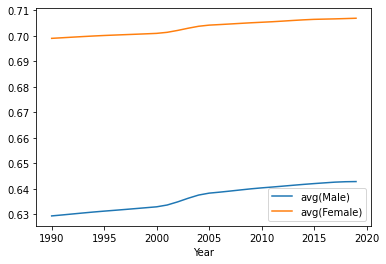

<AxesSubplot:xlabel='Year'>

In [0]:
bipolar_gender_sdf.toPandas().plot(kind='line',x='Year')

### Hypothesis 4

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

biploar_age_df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/bipolar_age.csv"))

biploar_age_df.printSchema()

root
-- Entity: string (nullable = true)
-- Code: string (nullable = true)
-- Year: integer (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 25 to 29 (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 10 to 14 (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 20 to 24 (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 5-14 years (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 15-49 years (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 50-69 years (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 70+ years (Percent): double (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: 30 to 34 (Percent): double (nullable = true)

In [0]:
biploar_age_df.show()

+-----------+----+----+-------------------------------------------------------------------+-------------------------------------------------------------------+-------------------------------------------------------------------+---------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------+--------------------------------------------------------------------+-------------------------------------------------------------------+
 Entity|Code|Year|Prevalence - Bipolar disorder - Sex: Both - Age: 25 to 29 (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 10 to 14 (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 20 to 24 (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 5-14 years (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 15-49 years (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 50-69 years (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 70+ years (Percent)|Prevalence - Bipolar disorder - Sex: Both - Age: 30 to 34 (Percent)|
+-----------+----+----+-------------------------------------------------------------------+-------------------------------------------------------------------+-------------------------------------------------------------------+---------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------+--------------------------------------------------------------------+-------------------------------------------------------------------+
Afghanistan| AFG|1990| 1.076955055| 0.283149418| 1.118383578| 0.13290471| 1.028703971| 0.907567983| 0.554962015| 1.008286629|
Afghanistan| AFG|1991| 1.072331737| 0.282412009| 1.115427549| 0.128759441| 1.030314972| 0.907229322| 0.555370827| 1.00765032|
Afghanistan| AFG|1992| 1.066936548| 0.281643284| 1.111314457| 0.125538561| 1.032505653| 0.906996429| 0.555697202| 1.006557313|
Afghanistan| AFG|1993| 1.064012419| 0.281105478| 1.10811812| 0.123086109| 1.034271655| 0.906777201| 0.555929535| 1.005432872|
Afghanistan| AFG|1994| 1.063394382| 0.280763905| 1.105963553| 0.12076673| 1.035201595| 0.906647258| 0.55610626| 1.00410612|
Afghanistan| AFG|1995| 1.063426853| 0.280560278| 1.10386336| 0.118088783| 1.035350718| 0.906342474| 0.556455499| 1.002336699|
Afghanistan| AFG|1996| 1.063448528| 0.280416122| 1.102581857| 0.114849427| 1.034423279| 0.906056948| 0.556719046| 1.000528284|
Afghanistan| AFG|1997| 1.063196167| 0.280334099| 1.102649092| 0.111854592| 1.032553648| 0.905707075| 0.556756777| 0.999154161|
Afghanistan| AFG|1998| 1.063091711| 0.280282873| 1.104415239| 0.110550378| 1.030269187| 0.905439081| 0.556625461| 0.998608869|
Afghanistan| AFG|1999| 1.063117167| 0.280260749| 1.107203562| 0.111213884| 1.027737736| 0.905411225| 0.556344829| 0.998856729|
Afghanistan| AFG|2000| 1.062793065| 0.280333897| 1.109801698| 0.11355624| 1.025110144| 0.903293325| 0.555878128| 0.999421346|
Afghanistan| AFG|2001| 1.062061786| 0.280492744| 1.111122263| 0.117667996| 1.023048025| 0.903675245| 0.555285166| 0.999767555|
Afghanistan| AFG|2002| 1.061422187| 0.280779798| 1.111197567| 0.122620428| 1.021810748| 0.903950603| 0.554770779| 0.999747557|
Afghanistan| AFG|2003| 1.061998134| 0.28120663| 1.11138922| 0.126816823| 1.021099817| 0.903913317| 0.554378358| 0.999561538|
Afghanistan| AFG|2004| 1.063290001| 0.281661718| 1.111332817| 0.129846714| 1.020601101| 0.903360423| 0.554134066| 0.999175786|
Afghanistan| AFG|2005| 1.064835633| 0.282088915| 1.111165457| 0.131929475| 1.020112239| 0.903653044| 0.554101604| 0.99870886|
Afghanistan| AFG|2006| 1.066516655| 0.282533244| 1.111620044| 0.132816022| 1.019571308| 0.902499822| 0.554063058| 0.998539646|
Afghanistan| AFG|2007| 1.067427227| 0.283073109| 1.112404462| 0.132623425| 1.019441471| 0.901469086| 0.55391338| 0.998717659|


In [0]:
biploar_agedf = biploar_age_df.withColumnRenamed("Entity", "country")\
       .withColumnRenamed("Code", "CountryCode")\
       .withColumnRenamed("Year", "Year")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 5-14 years (Percent)","5to14")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 10 to 14 (Percent)","10to14")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 25 to 29 (Percent)","25to29")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 20 to 24 (Percent)","20to24")\
        .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 15-49 years (Percent)","15to49")\
        .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 50-69 years (Percent)","50to69")\
        .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 70+ years (Percent)","70to90")\
         .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: 30 to 34 (Percent)","30to34")\

                
biploar_agedf .show()
biploar_agedf .printSchema()

+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
 country|CountryCode|Year| 25to29| 10to14| 20to24| 5to14| 15to49| 50to69| 70to90| 30to34|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
Afghanistan| AFG|1990|1.076955055|0.283149418|1.118383578| 0.13290471|1.028703971|0.907567983|0.554962015|1.008286629|
Afghanistan| AFG|1991|1.072331737|0.282412009|1.115427549|0.128759441|1.030314972|0.907229322|0.555370827| 1.00765032|
Afghanistan| AFG|1992|1.066936548|0.281643284|1.111314457|0.125538561|1.032505653|0.906996429|0.555697202|1.006557313|
Afghanistan| AFG|1993|1.064012419|0.281105478| 1.10811812|0.123086109|1.034271655|0.906777201|0.555929535|1.005432872|
Afghanistan| AFG|1994|1.063394382|0.280763905|1.105963553| 0.12076673|1.035201595|0.906647258| 0.55610626| 1.00410612|
Afghanistan| AFG|1995|1.063426853|0.280560278| 1.10386336|0.118088783|1.035350718|0.906342474|0.556455499|1.002336699|
Afghanistan| AFG|1996|1.063448528|0.280416122|1.102581857|0.114849427|1.034423279|0.906056948|0.556719046|1.000528284|
Afghanistan| AFG|1997|1.063196167|0.280334099|1.102649092|0.111854592|1.032553648|0.905707075|0.556756777|0.999154161|
Afghanistan| AFG|1998|1.063091711|0.280282873|1.104415239|0.110550378|1.030269187|0.905439081|0.556625461|0.998608869|
Afghanistan| AFG|1999|1.063117167|0.280260749|1.107203562|0.111213884|1.027737736|0.905411225|0.556344829|0.998856729|
Afghanistan| AFG|2000|1.062793065|0.280333897|1.109801698| 0.11355624|1.025110144|0.903293325|0.555878128|0.999421346|
Afghanistan| AFG|2001|1.062061786|0.280492744|1.111122263|0.117667996|1.023048025|0.903675245|0.555285166|0.999767555|
Afghanistan| AFG|2002|1.061422187|0.280779798|1.111197567|0.122620428|1.021810748|0.903950603|0.554770779|0.999747557|
Afghanistan| AFG|2003|1.061998134| 0.28120663| 1.11138922|0.126816823|1.021099817|0.903913317|0.554378358|0.999561538|
Afghanistan| AFG|2004|1.063290001|0.281661718|1.111332817|0.129846714|1.020601101|0.903360423|0.554134066|0.999175786|
Afghanistan| AFG|2005|1.064835633|0.282088915|1.111165457|0.131929475|1.020112239|0.903653044|0.554101604| 0.99870886|
Afghanistan| AFG|2006|1.066516655|0.282533244|1.111620044|0.132816022|1.019571308|0.902499822|0.554063058|0.998539646|
Afghanistan| AFG|2007|1.067427227|0.283073109|1.112404462|0.132623425|1.019441471|0.901469086| 0.55391338|0.998717659|
Afghanistan| AFG|2008|1.067733408| 0.28360726|1.113349825|0.132457927|1.019948538|0.900542779|0.553539896| 0.99928445|
Afghanistan| AFG|2009|1.067887832|0.284129272|1.114714422|0.132646673|1.021029854|0.899665976|0.552909332|1.000245269|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 20 rows

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- 25to29: double (nullable = true)
-- 10to14: double (nullable = true)
-- 20to24: double (nullable = true)
-- 5to14: double (nullable = true)
-- 15to49: double (nullable = true)
-- 50to69: double (nullable = true)
-- 70to90: double (nullable = true)
-- 30to34: double (nullable = true)

In [0]:
biploar_agedf.count()

Out[44]: 8220

In [0]:
biploar_agedf.createOrReplaceTempView("biploar_agedf")
biploar_agedf.count()
biploar_agedf.printSchema()

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- 25to29: double (nullable = true)
-- 10to14: double (nullable = true)
-- 20to24: double (nullable = true)
-- 5to14: double (nullable = true)
-- 15to49: double (nullable = true)
-- 50to69: double (nullable = true)
-- 70to90: double (nullable = true)
-- 30to34: double (nullable = true)

In [0]:
biploar_df = sqlContext.sql('select * from biploar_agedf where 25to29 IS NOT NULL or 10to14 IS NOT NULL or 20to24 IS NOT NULL or 5to14 IS NOT NULL or 50to69 IS NOT NULL or 70to90 IS NOT NULL or 30to34 IS NOT NULL')
biploar_df.show()

+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
 country|CountryCode|Year| 25to29| 10to14| 20to24| 5to14| 15to49| 50to69| 70to90| 30to34|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
Afghanistan| AFG|1990|1.076955055|0.283149418|1.118383578| 0.13290471|1.028703971|0.907567983|0.554962015|1.008286629|
Afghanistan| AFG|1991|1.072331737|0.282412009|1.115427549|0.128759441|1.030314972|0.907229322|0.555370827| 1.00765032|
Afghanistan| AFG|1992|1.066936548|0.281643284|1.111314457|0.125538561|1.032505653|0.906996429|0.555697202|1.006557313|
Afghanistan| AFG|1993|1.064012419|0.281105478| 1.10811812|0.123086109|1.034271655|0.906777201|0.555929535|1.005432872|
Afghanistan| AFG|1994|1.063394382|0.280763905|1.105963553| 0.12076673|1.035201595|0.906647258| 0.55610626| 1.00410612|
Afghanistan| AFG|1995|1.063426853|0.280560278| 1.10386336|0.118088783|1.035350718|0.906342474|0.556455499|1.002336699|
Afghanistan| AFG|1996|1.063448528|0.280416122|1.102581857|0.114849427|1.034423279|0.906056948|0.556719046|1.000528284|
Afghanistan| AFG|1997|1.063196167|0.280334099|1.102649092|0.111854592|1.032553648|0.905707075|0.556756777|0.999154161|
Afghanistan| AFG|1998|1.063091711|0.280282873|1.104415239|0.110550378|1.030269187|0.905439081|0.556625461|0.998608869|
Afghanistan| AFG|1999|1.063117167|0.280260749|1.107203562|0.111213884|1.027737736|0.905411225|0.556344829|0.998856729|
Afghanistan| AFG|2000|1.062793065|0.280333897|1.109801698| 0.11355624|1.025110144|0.903293325|0.555878128|0.999421346|
Afghanistan| AFG|2001|1.062061786|0.280492744|1.111122263|0.117667996|1.023048025|0.903675245|0.555285166|0.999767555|
Afghanistan| AFG|2002|1.061422187|0.280779798|1.111197567|0.122620428|1.021810748|0.903950603|0.554770779|0.999747557|
Afghanistan| AFG|2003|1.061998134| 0.28120663| 1.11138922|0.126816823|1.021099817|0.903913317|0.554378358|0.999561538|
Afghanistan| AFG|2004|1.063290001|0.281661718|1.111332817|0.129846714|1.020601101|0.903360423|0.554134066|0.999175786|
Afghanistan| AFG|2005|1.064835633|0.282088915|1.111165457|0.131929475|1.020112239|0.903653044|0.554101604| 0.99870886|
Afghanistan| AFG|2006|1.066516655|0.282533244|1.111620044|0.132816022|1.019571308|0.902499822|0.554063058|0.998539646|
Afghanistan| AFG|2007|1.067427227|0.283073109|1.112404462|0.132623425|1.019441471|0.901469086| 0.55391338|0.998717659|
Afghanistan| AFG|2008|1.067733408| 0.28360726|1.113349825|0.132457927|1.019948538|0.900542779|0.553539896| 0.99928445|
Afghanistan| AFG|2009|1.067887832|0.284129272|1.114714422|0.132646673|1.021029854|0.899665976|0.552909332|1.000245269|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 20 rows

In [0]:
biploar_df.count()
biploar_df.show()

+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
 country|CountryCode|Year| 25to29| 10to14| 20to24| 5to14| 15to49| 50to69| 70to90| 30to34|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
Afghanistan| AFG|1990|1.076955055|0.283149418|1.118383578| 0.13290471|1.028703971|0.907567983|0.554962015|1.008286629|
Afghanistan| AFG|1991|1.072331737|0.282412009|1.115427549|0.128759441|1.030314972|0.907229322|0.555370827| 1.00765032|
Afghanistan| AFG|1992|1.066936548|0.281643284|1.111314457|0.125538561|1.032505653|0.906996429|0.555697202|1.006557313|
Afghanistan| AFG|1993|1.064012419|0.281105478| 1.10811812|0.123086109|1.034271655|0.906777201|0.555929535|1.005432872|
Afghanistan| AFG|1994|1.063394382|0.280763905|1.105963553| 0.12076673|1.035201595|0.906647258| 0.55610626| 1.00410612|
Afghanistan| AFG|1995|1.063426853|0.280560278| 1.10386336|0.118088783|1.035350718|0.906342474|0.556455499|1.002336699|
Afghanistan| AFG|1996|1.063448528|0.280416122|1.102581857|0.114849427|1.034423279|0.906056948|0.556719046|1.000528284|
Afghanistan| AFG|1997|1.063196167|0.280334099|1.102649092|0.111854592|1.032553648|0.905707075|0.556756777|0.999154161|
Afghanistan| AFG|1998|1.063091711|0.280282873|1.104415239|0.110550378|1.030269187|0.905439081|0.556625461|0.998608869|
Afghanistan| AFG|1999|1.063117167|0.280260749|1.107203562|0.111213884|1.027737736|0.905411225|0.556344829|0.998856729|
Afghanistan| AFG|2000|1.062793065|0.280333897|1.109801698| 0.11355624|1.025110144|0.903293325|0.555878128|0.999421346|
Afghanistan| AFG|2001|1.062061786|0.280492744|1.111122263|0.117667996|1.023048025|0.903675245|0.555285166|0.999767555|
Afghanistan| AFG|2002|1.061422187|0.280779798|1.111197567|0.122620428|1.021810748|0.903950603|0.554770779|0.999747557|
Afghanistan| AFG|2003|1.061998134| 0.28120663| 1.11138922|0.126816823|1.021099817|0.903913317|0.554378358|0.999561538|
Afghanistan| AFG|2004|1.063290001|0.281661718|1.111332817|0.129846714|1.020601101|0.903360423|0.554134066|0.999175786|
Afghanistan| AFG|2005|1.064835633|0.282088915|1.111165457|0.131929475|1.020112239|0.903653044|0.554101604| 0.99870886|
Afghanistan| AFG|2006|1.066516655|0.282533244|1.111620044|0.132816022|1.019571308|0.902499822|0.554063058|0.998539646|
Afghanistan| AFG|2007|1.067427227|0.283073109|1.112404462|0.132623425|1.019441471|0.901469086| 0.55391338|0.998717659|
Afghanistan| AFG|2008|1.067733408| 0.28360726|1.113349825|0.132457927|1.019948538|0.900542779|0.553539896| 0.99928445|
Afghanistan| AFG|2009|1.067887832|0.284129272|1.114714422|0.132646673|1.021029854|0.899665976|0.552909332|1.000245269|
+-----------+-----------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 20 rows

In [0]:
bipolar_age_sdf= biploar_df.groupBy('Year').avg('25to29' ,'10to14' ,'20to24' ,'5to14','15to49' ,'50to69' ,'70to90','30to34')
display(bipolar_age_sdf)

Year,avg(25to29),avg(10to14),avg(20to24),avg(5to14),avg(15to49),avg(50to69),avg(70to90),avg(30to34)
1990,0.9651831827773725,0.22947449025182484,0.964520203510948,0.11285993328102185,0.9139697435729923,0.8709829451204382,0.5481444455109487,0.9286669256678834
2003,0.970055399558395,0.233427411948905,0.9727149975036495,0.11976869440510948,0.9185396117226274,0.8754502828540143,0.5476563167554745,0.9304266008138683
2007,0.9720273900912404,0.23514423809489068,0.974244526043796,0.1207147548394161,0.9208110941021898,0.8788329274379558,0.5444869680036495,0.931704209313869
2018,0.9725562637408756,0.2378382064124089,0.9786887454781016,0.11980376344525553,0.9258906003540148,0.8762360538759129,0.5378258195218978,0.9325662627080291
2015,0.9717948211642333,0.2372014874124088,0.9771332089854015,0.11893347900729916,0.9248885528941607,0.8779101417773724,0.5375223329781018,0.9332463621569345
2006,0.971788629624088,0.23488654716423374,0.974344354835767,0.1206754354744526,0.9203715323649638,0.8785563502664228,0.5454548681605842,0.9314027379306571
2013,0.9718977665985399,0.2366939061751824,0.975769606361314,0.11947330244160577,0.924002419689781,0.8789268017299265,0.5390160411277376,0.933270578835767
1997,0.9664927973430659,0.23100934912408763,0.9677425107080291,0.11495612703284676,0.9157301432956196,0.8695213985328469,0.5482515803357668,0.9291650727992701
1994,0.9657116709416061,0.23053457652554746,0.9662978856861307,0.114421009689781,0.9150463214854013,0.8696790008978106,0.5481634766386861,0.9292015462554735
2014,0.9718053923102186,0.2369768115182483,0.976479236678832,0.11916708259489049,0.92448414660219,0.878405488437956,0.5382522727919711,0.9333145925693435
